<a href="https://colab.research.google.com/github/Adrianus-Bagas/Tugas-Akhir/blob/main/Analisis_Sentimen_pada_Komentar_terhadap_Kebijakan_Perjalanan_Domestik_yang_Dikelompokkan_Menggunakan_Metode_Self_Organizing_Maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Sentimen pada Komentar terhadap Kebijakan Perjalanan Domestik yang Dikelompokkan Menggunakan Metode Self-Organizing Maps

## 1. Import beberapa library

In [1]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 209 kB 5.3 MB/s 


In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from numpy import random

import math

## 2. Memuat data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/MyDrive/dataset/data bus.csv')
df

,Tanggal,Komentar,SE
0,2022-03-09 6:05:29,Halo Sobat DAMRI ??????? Berdasarkan Surat Eda...,SE Kemenhub-23-2022
1,2022-03-09 6:05:57,1. Wajib menerapkan dan mematuhi protokol kese...,SE Kemenhub-23-2022
2,2022-03-12 9:57:58,Tolong tarif nya disesuaikan jg pak.. karena s...,SE Kemenhub-23-2022
3,2022-03-25 1:37:37,"@DamriIndonesia Min, layanan swab test nya mas...",SE Kemenhub-23-2022
4,2022-03-09 6:50:06,Damri selalu mengutamakan pelayanan dan prokes,SE Kemenhub-23-2022
...,...,...,...
283,2021-08-26 17:37:48,naik trevel bisa bawa anak,SE Satgas-17-2021
284,2021-08-28 0:32:22,Kalo belum dpt vaksin dan urusan mendesak baga...,SE Satgas-17-2021
285,2021-08-28 7:13:28,min klo blm boleh vaksin kedua krn abis positi...,SE Satgas-17-2021
286,2021-08-28 7:18:07,"PCR aja keluar hasilnya lama, mikir donk yg bu...",SE Satgas-17-2021


## 3. Text Preprocessing

### a. Menghapus duplikasi dan kolom yang kosong

In [6]:
df.isnull().sum()

Tanggal     0
Komentar    0
SE          0
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df

,Tanggal,Komentar,SE
0,2022-03-09 6:05:29,Halo Sobat DAMRI ??????? Berdasarkan Surat Eda...,SE Kemenhub-23-2022
1,2022-03-09 6:05:57,1. Wajib menerapkan dan mematuhi protokol kese...,SE Kemenhub-23-2022
2,2022-03-12 9:57:58,Tolong tarif nya disesuaikan jg pak.. karena s...,SE Kemenhub-23-2022
3,2022-03-25 1:37:37,"@DamriIndonesia Min, layanan swab test nya mas...",SE Kemenhub-23-2022
4,2022-03-09 6:50:06,Damri selalu mengutamakan pelayanan dan prokes,SE Kemenhub-23-2022
...,...,...,...
283,2021-08-26 17:37:48,naik trevel bisa bawa anak,SE Satgas-17-2021
284,2021-08-28 0:32:22,Kalo belum dpt vaksin dan urusan mendesak baga...,SE Satgas-17-2021
285,2021-08-28 7:13:28,min klo blm boleh vaksin kedua krn abis positi...,SE Satgas-17-2021
286,2021-08-28 7:18:07,"PCR aja keluar hasilnya lama, mikir donk yg bu...",SE Satgas-17-2021


In [9]:
df = df.drop_duplicates(subset=["Komentar"])

In [10]:
df

,Tanggal,Komentar,SE
0,2022-03-09 6:05:29,Halo Sobat DAMRI ??????? Berdasarkan Surat Eda...,SE Kemenhub-23-2022
1,2022-03-09 6:05:57,1. Wajib menerapkan dan mematuhi protokol kese...,SE Kemenhub-23-2022
2,2022-03-12 9:57:58,Tolong tarif nya disesuaikan jg pak.. karena s...,SE Kemenhub-23-2022
3,2022-03-25 1:37:37,"@DamriIndonesia Min, layanan swab test nya mas...",SE Kemenhub-23-2022
4,2022-03-09 6:50:06,Damri selalu mengutamakan pelayanan dan prokes,SE Kemenhub-23-2022
...,...,...,...
283,2021-08-26 17:37:48,naik trevel bisa bawa anak,SE Satgas-17-2021
284,2021-08-28 0:32:22,Kalo belum dpt vaksin dan urusan mendesak baga...,SE Satgas-17-2021
285,2021-08-28 7:13:28,min klo blm boleh vaksin kedua krn abis positi...,SE Satgas-17-2021
286,2021-08-28 7:18:07,"PCR aja keluar hasilnya lama, mikir donk yg bu...",SE Satgas-17-2021


### b. Case Folding

In [11]:
def case_folding(txt):
    pattern = r'[^a-zA-Z\s]'
    text = re.sub(pattern,'',txt)
    return text.lower()

### c. Tokenizing

In [12]:
def token(txt):
    return word_tokenize(txt)

### d. Normalisasi Teks

In [13]:
#Kamus
Kamus = {
    'kasihan' : ['kasian','ksiann'],
    'kalau' : ['klo','kalo','kl','klau','klw','klu'],
    'harus' : ['hrs','kudu','musti','hrus'],
    'pakai' : ['pake','pke','pakek','make'],
    'tes' : ['test'],
    'sudah' : ['udah','dah','dh','wes','sdh','ud','sdah'],
    'sekarang' : ['skrg','skrng','skrang','skr'],
    'tunggu' : ['nunggu'],
    'hanya' : ['hny','cuma','cuman','cmn','cm'],
    'tunjukkan' : ['nunjukkin'],
    'saja' : ['aja','aj','sj','ajh','ajah'],   
    'di' : ['d'], 
    'yang' : ['yg','seng'], 
    'tahun' : ['th','thn','thun','taun'], 
    'dari' : ['dri', 'dr'],
    'sampai' : ['sampe','spe','smp','sampek','smpai'],
    'berapa' : ['brp','brapa','brpa'],
    'tidak' : ['ga','engga','gak','nggak','tdk','gk','g','kga','ndak','ngga','tida','kaga','nda','ngk'],
    'tetap' : ['ttp','tetep'],
    'tanggal' : ['tgl'],
    'jadi' : ['jd','jdi'],
    'ingin' : ['pengen','pgn','pngn'],
    'jangan' : ['jgn'],
    'masih' : ['msh','msih','masi','msi'],
    'buat' : ['bikin','bkin'],
    'malam' : ['malem','mlm'],
    'nomor' : ['no'],
    'kapan' : ['kpn'],
    'sekali' : ['skali'],
    'juga' : ['jg','jga'],
    'ya' : ['y','yah','iya','yaa','yak'],
    'susah' : ['angel'],
    'tahu' : ['tau'],
    'bagaimana' : ['gimana','gmna','gmn','gimna','piye'],
    'untuk' : ['utk','unt','untk','tuk'],
    'mengapa' : ['knp','kenapa'],
    'sangat' : ['bgt','banget','amat'],
    'tangis' : ['nangis','mewek'],
    'terimakasih' : ['makasih','trims','thx','thanks','terima kasih','nuhuun','tks','tq','mksh'],
    'tolong' : ['plis','please','tlg','mhn','mhon'],
    'belum' : ['blm','blum','belom','blom'],
    'antigen' : ['antigent'],
    'pada' : ['pd','pda'], 
    'sama' : ['sma','sm'],
    'terus' : ['trus'], 
    'mungkin' : ['mgkn'], 
    'bisa' : ['bs','iso'], 
    'ada' : ['da','ad'], 
    'begitu' : ['gt','gitu'], 
    'karena' : ['karna','krn','krna'],
    'mau' : ['mw','mo'], 
    'orang' : ['org','orng'],
    'bulan' : ['bln'],
    'memang' : ['emng','emg'], 
    'kemarin' : ['kemaren','kmren','kmrn'], 
    'dengan' : ['dgn','dg'], 
    'sempat' : ['sempet'], 
    'mereka' : ['mrk'], 
    'orang tua' : ['ortu'],
    'lagi' : ['lg'], 
    'keterangan' : ['ket'],
    'provinsi' : ['propinsi'],  
    'perlu' : ['usah','ush'], 
    'dahulu' : ['dulu','dl','dlu'], 
    'senang' : ['seneng','sng','happy'], 
    'rapid' : ['rapit'],
    'kartukeluarga' : ['kk','kartu keluarga'], 
    'fotocopy' : ['foto copy','fc','fotokopi'],
    'naik' : ['naek','numpak'], 
    'keretaapi' : ['ka','kai','kreta','kereta','sepur','kereta api'],    
    'boleh' : ['bole','blh','bleh'], 
    'lihat' : ['liat'], 
    'berangkat' : ['brgkt','brngkt','brkt','brgkat'], 
    'stasiun' : ['st'], 
    'pusing' : ['ribet','ruwet'], 
    'dalam' : ['dlm'], 
    'bukan' : ['bkn'], 
    'tersebut' : ['tsb'],
    'skrining' : ['screening'], 
    'cetak' : ['print'],
    'besok' : ['bsk'], 
    'tapi' : ['tp','tpi'], 
    'benar' : ['bener','bnr'], 
    'dapat' : ['dapet','dpt'], 
    'strp' : ['srtp'], 
    'aku' : ['sy','sya','aq','saya'], 
    'malas' : ['males'], 
    'pulang' : ['plg'], 
    'datang' : ['dtg','dateng'], 
    'atau' : ['ato','atw'],
    'ibuhamil' : ['bumil','ibu hamil'],
    'pesan' : ['psn','pesen','mesen'], 
    'uang' : ['duit','cuan','money'], 
    'penting' : ['urgen','urgent'], 
    'bayi' : ['baby'], 
    'rumahsakit' : ['rumah sakit','rs'],
    'bandara' : ['airport'], 
    'tanya' : ['nanya','nnya','tnya'], 
    'antibody' : ['anti body','antibodi','anti bodi'],
    'pedulilindugi' : ['peduli lindungi'], 
    'izin' : ['ijin'], 
    'akta' : ['akte'], 
    'pulangpergi' : ['pp'],
    ' ' : ['admin','admind','mind','min','nya','kak','ya']
}

In [14]:
def cari_kata(kata):
    for key in Kamus:
        list_kata = Kamus.get(key)
        if kata in list_kata:
            return key
    return kata
def normalisasi(kalimat):
    hasil_normalisasi = []
    for kata in kalimat:
        kata_baru = kata.replace(kata, cari_kata(kata))
        hasil_normalisasi.append(kata_baru)
    return hasil_normalisasi

### e. Menghapus stopwords

In [15]:
def hapus_stopword(txt):
    stop_words = set(stopwords.words('indonesian'))
    return " ".join([w for w in txt if w not in stop_words and len(w)>1])

### f. Stemming

In [16]:
def stem(txt):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    return stemmer.stem(txt)

### --- Hasil Preprocessing ---

In [17]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [18]:
komentar = df.Komentar
hasil_praproses = komentar.apply(case_folding).apply(token).apply(normalisasi).apply(hapus_stopword).apply(stem)

In [19]:
df['Hasil Praproses'] = hasil_praproses
hasil_praproses

0      halo sobat damri dasar surat edar satgas covid...
1      wajib terap patuh protokol sehat jalan langgan...
2      tolong tarif sesuai duduk damping pakai jaga j...
3           damriindonesia layan swab tes stasiun gambir
4                               damri utama layan prokes
                             ...                        
283                                     trevel bawa anak
284    vaksin urus desak surat vaksin repot vaksin ra...
285                                  vaksin abis positif
286                            pcr hasil mikir donk atur
287                                    urus anak menteri
Name: Komentar, Length: 288, dtype: object

## 4. Exploratory Data Analysis

### a. Visualisasi Surat Edaran

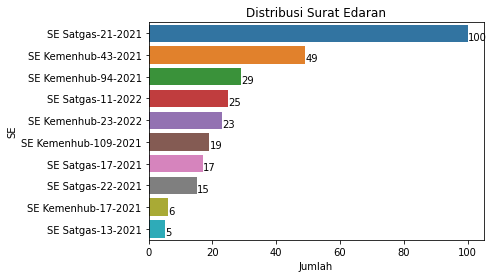

In [20]:
large_to_small = df.groupby('SE').size().sort_values().index[::-1]
ax = sns.countplot(y="SE", data=df, order=large_to_small)
plt.title('Distribusi Surat Edaran')
plt.xlabel('Jumlah')

total = len(df['SE'])
for p in ax.patches:
        percentage = '{:.0f}'.format(p.get_width())
        x = p.get_x() + p.get_width() + 0.1
        y = p.get_y() + 0.3 + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

### b. Visualisasi Komentar Sebelum Praproses

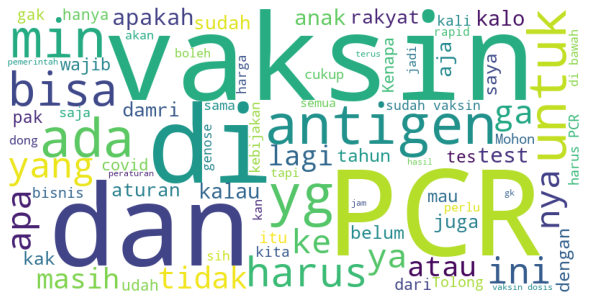

In [21]:
text = " ".join(komen for komen in df["Komentar"])
text1 = " ".join(komen for komen in df["Hasil Praproses"])
wordcloud = WordCloud(width = 800, height = 400,
                background_color ='white',
                min_font_size = 12).generate(text)                  
plt.figure(figsize = (8, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

### c. Visualisasi Komentar Setelah Praproses

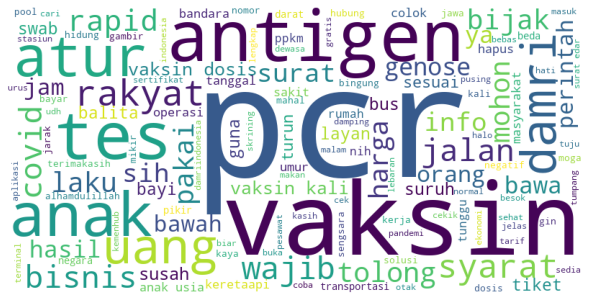

In [22]:
text1 = " ".join(komen for komen in df["Hasil Praproses"])
wordcloud = WordCloud(width = 800, height = 400,
                background_color ='white',
                min_font_size = 12).generate(text1)                  
plt.figure(figsize = (8, 4), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

## 5. Ekstraksi Fitur Menggunakan TFIDF

### a. TFIDF

In [23]:
tfidf = TfidfVectorizer()
fix_data = tfidf.fit_transform(hasil_praproses).toarray()

In [24]:
fix_data

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.70205123, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [25]:
fix_data.shape

(288, 721)

### b. Menyimpan Matriks TFIDF ke dalam CSV

In [26]:
df_tfidf = pd.DataFrame(fix_data)
df_tfidf

,0,1,2,3,4,5,6,7,8,9,...,711,712,713,714,715,716,717,718,719,720
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.324865,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
284,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
285,0.702051,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
286,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# df_tfidf.to_csv('/content/drive/MyDrive/dataset/tfidf bus df 10.csv')

## 6. Penentuan Jumlah Cluster Menggunakan Silhouette Coefficient dan Proses Clustering Menggunakan Self-organizing Maps

### a. Perancangan SOM

In [28]:
def KohonenSOM(x_unit,n_cluster,max_epoch,learning_rate,radius,lr_decay):
    # Step 0
    w = np.random.uniform(size=(x_unit.shape[1],n_cluster))
    epoch = 0
    
    # Step 1
    while epoch < max_epoch:
        stop = True
        # Step 2
        for x in x_unit:
            # Step 3
            d = [sum((w[:,j] - x)**2) for j in range(w.shape[1])]
            
            # Step 4
            min_index = np.argmin(d)
            
            # Step 5
            left_index = min_index - radius
            right_index = min_index + radius
            
            # Ketika ketanggaan J diluar batas index
            if left_index < 0: left_index = 0
            if right_index >= w.shape[1]: right_index = w.shape[1]-1
            
            temp_w = np.copy(w)
            for j in range(left_index,right_index+1):
                w[:,j] += learning_rate*(x - w[:,j])
            
            delta_w = w - temp_w
            if not np.array_equal(delta_w,np.zeros(delta_w.shape)):
                stop = False
            
        # Step 6
        learning_rate = learning_rate * lr_decay
        
        # Step 7
        if radius>0 and epoch%20 == 0:
            radius -= 1
        
        # Step 8
        if stop:
            break
            
        epoch += 1
    return w

In [29]:
def PredictKohonenSOM(x_input,weight):
    d = [sum((weight[:,j] - x_input)**2) for j in range(weight.shape[1])]
    return np.argmin(d)

### b. Penentuan learning rate, ketetanggaan, dan konstanta penurunan learning rate secara acak

In [30]:
# learning_rate = round(random.uniform(0,1), 2)
# radius = random.randint(0,4)
# lr_decay = round(random.uniform(0, 1), 2)
# print(learning_rate, radius, lr_decay)

### c. Penentuan jumlah cluster menggunakan silhouette coefficient

In [32]:
cluster = []
for i in range(2,11):
    som = KohonenSOM(fix_data,i,100,0.68,3,0.89)
    predKlaster0 = [PredictKohonenSOM(dt,som) for dt in fix_data]
    cluster.append(silhouette_score(fix_data, predKlaster0))
print('Jumlah cluster terbaik :',cluster.index(max(cluster))+2)

Jumlah cluster terbaik : 4


### d. Clustering dengan SOM menggunakan parameter yang didapat

In [34]:
som = KohonenSOM(fix_data,4,100,0.68,3,0.89)
predKlaster0 = [PredictKohonenSOM(dt,som) for dt in fix_data]
print(predKlaster0.count(0))
print(predKlaster0.count(1))
print(predKlaster0.count(2))
print(predKlaster0.count(3))
print(predKlaster0.count(4))
print(predKlaster0.count(5))
print(predKlaster0.count(6))
print(predKlaster0.count(7))
print(predKlaster0.count(8))
print(predKlaster0.count(9))

45
48
55
140
0
0
0
0
0
0


In [35]:
df['cluster'] = predKlaster0

## 7. Visualisasi Wordcloud tiap cluster beserta kata yang sering muncul
Catatan : sesuaikan dengan jumlah cluster yang didapat

In [36]:
df_new = df[df["cluster"]==0]
df_new = df_new.dropna()
df_new

,Tanggal,Komentar,SE,Hasil Praproses,cluster
1,2022-03-09 6:05:57,1. Wajib menerapkan dan mematuhi protokol kese...,SE Kemenhub-23-2022,wajib terap patuh protokol sehat jalan langgan...,0
30,2021-07-07 14:17:44,mulai hari ini wajib surat vaksin dan antigen....,SE Kemenhub-43-2021,wajib surat vaksin antigen loket langsung mba,0
38,2021-07-08 2:58:53,"Bila kakak belum mendapatkan vaksin, boleh men...",SE Kemenhub-43-2021,kakak vaksin surat terang bebas covid dasar an...,0
47,2021-07-09 3:58:48,"Betul kak, kalau kakak sudah vaksin dosis pert...",SE Kemenhub-43-2021,kakak vaksin dosis vaksin,0
50,2021-07-10 10:49:34,Kalo udh vaksin dosis 2 apa ttp harus pake sur...,SE Kemenhub-43-2021,udh vaksin dosis pakai surat antigen,0
51,2021-07-16 11:06:34,Min kalo sudah vaksin apakah harus menyertakan...,SE Kemenhub-43-2021,vaksin serta rapid antigen,0
53,2022-03-09 6:36:26,Alhamdulillah… trims damri… sudah vaksin 2 kal...,SE Kemenhub-23-2022,alhamdulillah terimakasih damri vaksin kali am...,0
71,2021-07-05 14:42:24,Jadi klo blm bisa vaksin antigen saja cukup ka...,SE Kemenhub-43-2021,vaksin antigen,0
73,2021-07-05 14:59:36,"Ga semua masyarakat sdh vaksin, ada yg msh pro...",SE Kemenhub-43-2021,masyarakat vaksin proses,0
76,2021-07-06 0:03:59,"Kalau sudah vaksin, tidak usah menyertakan has...",SE Kemenhub-43-2021,vaksin serta hasil antigen,0


### a. Wordcloud n-gram

In [37]:
def checkuni(col):
    c_vec_1 = CountVectorizer(ngram_range=(1,1))
    # matrix dari ngrams
    data_ngrams = col
    ngrams_1 = c_vec_1.fit_transform(data_ngrams)
    # menghitung frekuensi dari ngrams
    count_values_1 = ngrams_1.toarray().sum(axis=0)
    # list dataframe ngrams
    vocab_1 = c_vec_1.vocabulary_
    data_unigram = pd.DataFrame(sorted([(count_values_1[i],k) for k,i in vocab_1.items()], reverse=True)).rename(columns={0: 'frequency', 1:'unigram'})
    return data_unigram

def checkbi(col):
    c_vec_2 = CountVectorizer(ngram_range=(2,2))
    # matrix dari ngrams
    data_ngrams = col
    ngrams_2 = c_vec_2.fit_transform(data_ngrams)
    # menghitung frekuensi dari ngrams
    count_values_2 = ngrams_2.toarray().sum(axis=0)
    # list dataframe ngrams
    vocab_2 = c_vec_2.vocabulary_
    data_bigram = pd.DataFrame(sorted([(count_values_2[i],k) for k,i in vocab_2.items()], reverse=True)
                ).rename(columns={0: 'frequency', 1:'bigram'})
    return data_bigram

def checktri(col):
    c_vec_3 = CountVectorizer(ngram_range=(3,3))
    # matrix dari ngrams
    data_ngrams = col
    ngrams_3 = c_vec_3.fit_transform(data_ngrams)

    # menghitung frekuensi dari ngrams
    count_values_3 = ngrams_3.toarray().sum(axis=0)

    # list dataframe ngrams
    vocab_3 = c_vec_3.vocabulary_
    data_trigram = pd.DataFrame(sorted([(count_values_3[i],k) for k,i in vocab_3.items()], reverse=True)
                ).rename(columns={0: 'frequency', 1:'trigram'})

    return data_trigram

In [41]:
dat_unigram = checkuni(df_new['Hasil Praproses'].astype(str))
dat_bigram = checkbi(df_new['Hasil Praproses'].astype(str))
dat_trigram = checktri(df_new['Hasil Praproses'].astype(str))

In [42]:
dat_uni = dat_unigram.set_index('unigram').to_dict()['frequency']
dat_bi = dat_bigram.set_index('bigram').to_dict()['frequency']
dat_tri = dat_trigram.set_index('trigram').to_dict()['frequency']

In [43]:
def generate_wordcloud(data):
    #vectorizer = CountVectorizer(ngram_range=(2,2))
    cloud = WordCloud(width=1600, height=800,
                      random_state=21,
                      background_color='white',
                      min_font_size = 12).generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.tight_layout(pad=0)
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

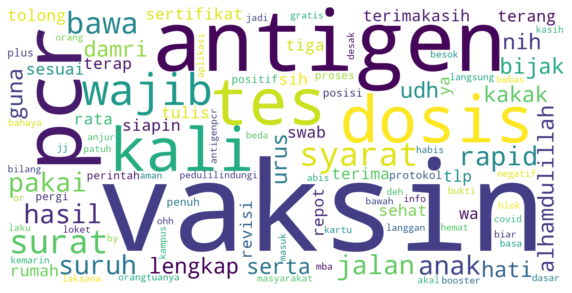

In [44]:
generate_wordcloud(dat_uni)

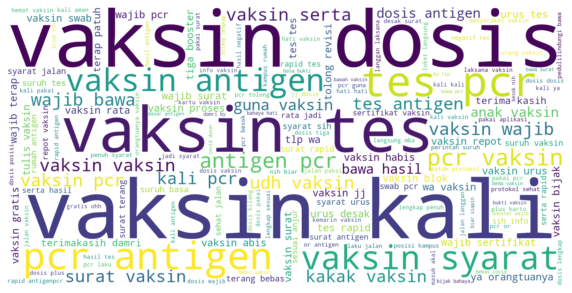

In [45]:
generate_wordcloud(dat_bi)

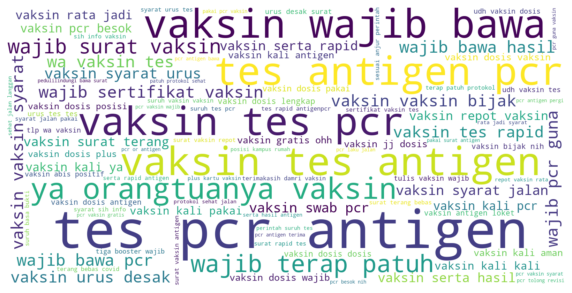

In [46]:
generate_wordcloud(dat_tri)

### b. Frekuensi n-gram terbanyak

In [47]:
dat_unigram[0:5]

,frequency,unigram
0,57,vaksin
1,20,antigen
2,19,pcr
3,11,tes
4,11,dosis


In [48]:
dat_bigram[0:5]

,frequency,bigram
0,8,vaksin kali
1,8,vaksin dosis
2,5,vaksin tes
3,5,tes pcr
4,4,pcr antigen


In [49]:
dat_trigram[0:5]

,frequency,trigram
0,4,tes pcr antigen
1,2,vaksin wajib bawa
2,2,vaksin tes pcr
3,2,vaksin tes antigen
4,2,tes antigen pcr


## 8. Analisis Sentimen setiap cluster
Catatan : sesuaikan dengan jumlah cluster yang didapat

### a. Praproses teks tanpa menghapus stopwords

In [50]:
def hapus_stopword_sentimen(txt):
  return " ".join([w for w in txt])

In [51]:
komentar_sentimen = df.Komentar
hasil_praproses_sentimen = komentar_sentimen.apply(case_folding).apply(token).apply(normalisasi).apply(hapus_stopword_sentimen).apply(stem)

In [52]:
df["Hasil Praproses Sentimen"] = hasil_praproses_sentimen

### b. Mencari sentimen setiap komentar

In [53]:
posd = pd.read_csv('/content/drive/MyDrive/dataset/positive.tsv', sep='\t')
negd = pd.read_csv('/content/drive/MyDrive/dataset/negative.tsv', sep='\t')

In [55]:
sentimen = []
nilai_sentimen = []
for i in range(df.shape[0]):
  count_pos = 0
  count_neg = 0
  count_net = 0
  file = df["Hasil Praproses Sentimen"][i].split(" ")
  for r in file:
    if r in posd['word'].unique():
      indeks = list(posd['word']).index(r)
      bobot = posd['weight'].get(indeks)
      count_pos = count_pos + bobot
    elif r in negd['word'].unique():
      indeks = list(negd['word']).index(r)
      bobot = negd['weight'].get(indeks)
      count_neg = count_neg + bobot
    else:
      count_net += 1 
  final_sent = count_pos + count_neg
  if final_sent < 0:
    sentimen.append("Negatif")
  elif final_sent > 0:
    sentimen.append("Positif")
  else:
    sentimen.append("Netral")

In [56]:
df["Sentimen"] = sentimen

In [57]:
df_sentimen = df[df["cluster"]==0]
df_sentimen = df_sentimen.dropna()
df_sentimen

,Tanggal,Komentar,SE,Hasil Praproses,cluster,Hasil Praproses Sentimen,Sentimen
1,2022-03-09 6:05:57,1. Wajib menerapkan dan mematuhi protokol kese...,SE Kemenhub-23-2022,wajib terap patuh protokol sehat jalan langgan...,0,wajib terap dan patuh protokol sehat lama laku...,Negatif
30,2021-07-07 14:17:44,mulai hari ini wajib surat vaksin dan antigen....,SE Kemenhub-43-2021,wajib surat vaksin antigen loket langsung mba,0,mulai hari ini wajib surat vaksin dan antigen ...,Positif
38,2021-07-08 2:58:53,"Bila kakak belum mendapatkan vaksin, boleh men...",SE Kemenhub-43-2021,kakak vaksin surat terang bebas covid dasar an...,0,bila kakak belum dapat vaksin boleh guna surat...,Positif
47,2021-07-09 3:58:48,"Betul kak, kalau kakak sudah vaksin dosis pert...",SE Kemenhub-43-2021,kakak vaksin dosis vaksin,0,betul kalau kakak sudah vaksin dosis pertama d...,Positif
50,2021-07-10 10:49:34,Kalo udh vaksin dosis 2 apa ttp harus pake sur...,SE Kemenhub-43-2021,udh vaksin dosis pakai surat antigen,0,kalau udh vaksin dosis apa tetap harus pakai s...,Negatif
51,2021-07-16 11:06:34,Min kalo sudah vaksin apakah harus menyertakan...,SE Kemenhub-43-2021,vaksin serta rapid antigen,0,kalau sudah vaksin apakah harus serta rapid an...,Negatif
53,2022-03-09 6:36:26,Alhamdulillah… trims damri… sudah vaksin 2 kal...,SE Kemenhub-23-2022,alhamdulillah terimakasih damri vaksin kali am...,0,alhamdulillah terimakasih damri sudah vaksin k...,Positif
71,2021-07-05 14:42:24,Jadi klo blm bisa vaksin antigen saja cukup ka...,SE Kemenhub-43-2021,vaksin antigen,0,jadi kalau belum bisa vaksin antigen saja cuku...,Negatif
73,2021-07-05 14:59:36,"Ga semua masyarakat sdh vaksin, ada yg msh pro...",SE Kemenhub-43-2021,masyarakat vaksin proses,0,tidak semua masyarakat sudah vaksin ada yang m...,Negatif
76,2021-07-06 0:03:59,"Kalau sudah vaksin, tidak usah menyertakan has...",SE Kemenhub-43-2021,vaksin serta hasil antigen,0,kalau sudah vaksin tidak perlu serta hasil ant...,Positif


### c. Mencari jumlah sentimen setiap surat edaran

In [58]:
for i in df_sentimen["SE"].unique():
  a = df_sentimen[df_sentimen["SE"]==i]
  print(i,a[a["Sentimen"]=="Positif"].shape[0],a[a["Sentimen"]=="Negatif"].shape[0],a[a["Sentimen"]=="Netral"].shape[0])

SE Kemenhub-23-2022 1 1 0
SE Kemenhub-43-2021 7 4 0
SE Satgas-11-2022 1 4 1
SE Satgas-22-2021 0 2 0
SE Kemenhub-109-2021 0 1 0
SE Kemenhub-94-2021 1 1 1
SE Satgas-21-2021 6 11 0
SE Satgas-17-2021 1 1 1
